# Welcome to FIX!
In this noteobok, we give some examples of **loading dataset** and **running benchmarks**.

For our paper, please see: XXXXXXXXXXXXXXX

## Loading Datasets

In [1]:
# !pip install exlib

import sys
sys.path.insert(0, "src")
import exlib
import torch
import torchvision
import matplotlib.pyplot as plt

/home/antonxue/lib/miniconda3/envs/exlib/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Cholecystectomy Dataset

This dataset contains image data from cholecystectomy surgery (gallbladder removal).
The fields are as follows:
* `image`: A  is of the surgery.
* `gonogo`: Where it is safe or unsafe to operate. Background (0), safe (1), and unsafe (2).
* `organs`: Relevant organ structures for surgery. Background (0), liver (1), gallbladder (2), and hepatocystic triangle (3). These are the expert-specified interpretable features.

In [2]:
cholec_dataset = exlib.datasets.cholec.CholecDataset(split="test")
cholec_item = cholec_dataset[0]
for k, v in cholec_item.items(): print(f"{k}, {v.shape}, {v.dtype}")

image, torch.Size([3, 360, 640]), torch.float32
gonogo, torch.Size([360, 640]), torch.int64
organs, torch.Size([360, 640]), torch.int64


Text(0.5, 1.0, 'Back (0), Liver (1), Gallb. (2), Hept. (3)')

<Figure size 640x480 with 0 Axes>

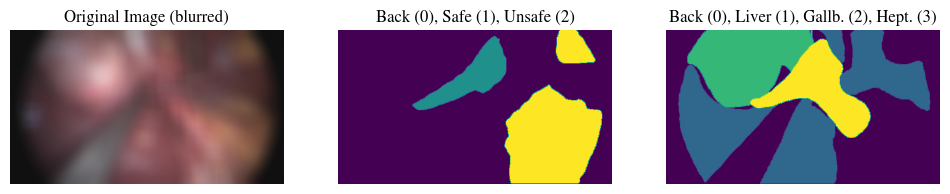

In [3]:
plt.clf()
fig, ax = plt.subplots(1, 3, figsize=(12,4))
for i in range(3): ax[i].set_axis_off()

# cholec_image = cholec_item["image"]
cholec_image = torchvision.transforms.GaussianBlur(41, (50.0, 50.0))(cholec_item["image"])

ax[0].imshow(cholec_image.numpy().transpose(1,2,0))
ax[1].imshow(cholec_item["gonogo"].numpy())
ax[2].imshow(cholec_item["organs"].numpy())

ax[0].set_title("Original Image (blurred)")
ax[1].set_title("Back (0), Safe (1), Unsafe (2)")
ax[2].set_title("Back (0), Liver (1), Gallb. (2), Hept. (3)")

### Chest X-ray Dataset

This dataset contains vision data for chest X-ray pathology identification.
The fields are as follows:

* `image`: The image of the chest X-ray.
* `pathols`: A binary vector that denotes which of the 14 pathologies are present.
* `struct`: A collection of binary masks over the image for the relevant anatomical structures. These are the expert-specified interpretable features.

In [4]:
chestx_dataset = exlib.datasets.chestx.ChestXDataset(split="test")

print("All pathologies:")
print(", ".join([f"({i}) {s}" for i,s in enumerate(chestx_dataset.pathology_names)]))

print("\nAll structures:")
print(", ".join([f"({i}) {s}" for i,s in enumerate(chestx_dataset.structure_names)]))

All pathologies:
(0) Atelectasis, (1) Cardiomegaly, (2) Consolidation, (3) Edema, (4) Effusion, (5) Emphysema, (6) Fibrosis, (7) Hernia, (8) Infiltration, (9) Mass, (10) Nodule, (11) Pleural_Thickening, (12) Pneumonia, (13) Pneumothorax

All structures:
(0) Left Clavicle, (1) Right Clavicle, (2) Left Scapula, (3) Right Scapula, (4) Left Lung, (5) Right Lung, (6) Left Hilus Pulmonis, (7) Right Hilus Pulmonis, (8) Heart, (9) Aorta, (10) Facies Diaphragmatica, (11) Mediastinum, (12) Weasand, (13) Spine


In [5]:
# Find a representative image to use
for i in range(10000):
    chestx_item = chestx_dataset[i]
    if chestx_item["pathols"].sum() > 1: break

for k, v in chestx_item.items(): print(f"{k}, {v.shape}, {v.dtype}")

image, torch.Size([1, 224, 224]), torch.float32
pathols, torch.Size([14]), torch.int64
structs, torch.Size([14, 224, 224]), torch.int64


<Figure size 640x480 with 0 Axes>

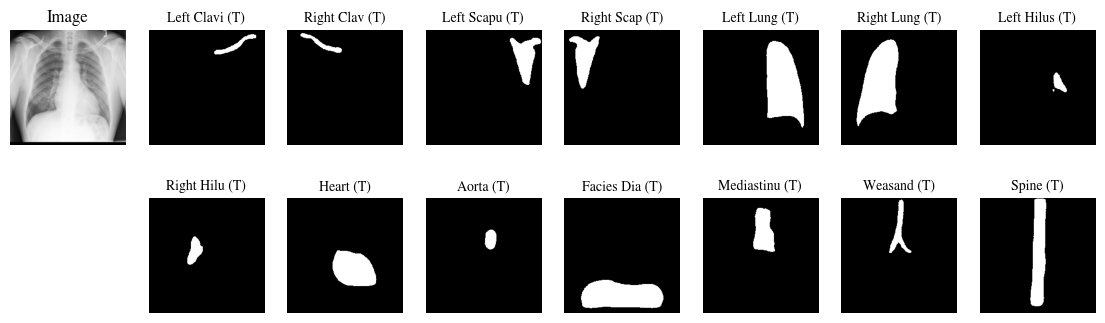

In [6]:
plt.clf()
fig, ax = plt.subplot_mosaic([
    (["image"] + [f"struct{i}" for i in range(7)]),
    (["."] + [f"struct{i}" for i in range(7,14)]),
], figsize=(14,4))

for _, a in ax.items(): a.set_axis_off()

struct_titles = chestx_dataset.structure_names
ax["image"].imshow(chestx_item["image"].numpy().transpose(1,2,0), cmap="gray")
ax["image"].set_title("Image")

for i in range(14):
    mask_t = chestx_item["structs"][i].unsqueeze(0)
    ax[f"struct{i}"].imshow((mask_t.numpy().transpose(1,2,0)) * 2, cmap="gray")
    ax[f"struct{i}"].set_title(f"{struct_titles[i][:10]} (T)", fontsize=10)

In [7]:
print(f"Pathologies present:")
for idx in chestx_item["pathols"].nonzero():
    print("*", chestx_dataset.pathology_names[idx.item()])

Pathologies present:
* Cardiomegaly
* Infiltration
